<a href="https://colab.research.google.com/github/Informationowner/Diploma/blob/main/Art_detectio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sun Jun  4 14:11:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
import os
HOME = os.getcwd()
print(HOME)

/content


# Новый раздел

## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [4]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.114 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [1]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 595.4/595.4 kB 44.0 MB/s eta 0:00:00


In [8]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="vy0fu3fH3bTXph6BIbqw")
project = rf.workspace("diploma-fsn1y").project("printing-artifact-detector")
dataset = project.version(4).download("yolov8")





mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.2 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=1a00d8dc375bc824520746a7ec00ce21fd7b4e9707e3e4811670f2a86017ec23
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninsta

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.114, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Printing-Artifact-Detector-4 in yolov8:: 100%|██████████| 240/240 [00:00<00:00, 856.08it/s]


## Custom Training

In [9]:
print({dataset.location})

{'/content/datasets/Printing-Artifact-Detector-4'}


In [25]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=300 imgsz=800 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Printing-Artifact-Detector-4/data.yaml, epochs=300, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=

In [ ]:
!ls {HOME}/runs/detect/train8/

args.yaml					    train_batch0.jpg
events.out.tfevents.1685881957.a4d5a1da5013.8434.0  train_batch1.jpg
results.csv					    train_batch2.jpg
results.png					    weights


In [ ]:
project.version(DATASET_VERSION).deploy(model_type=”yolov8”, model_path=f”{HOME}/runs/detect/train2/”)

SyntaxError: ignored

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train8/confusion_matrix.png', width=600)

[Errno 2] No such file or directory: '{HOME}'
/content


NameError: ignored

/content


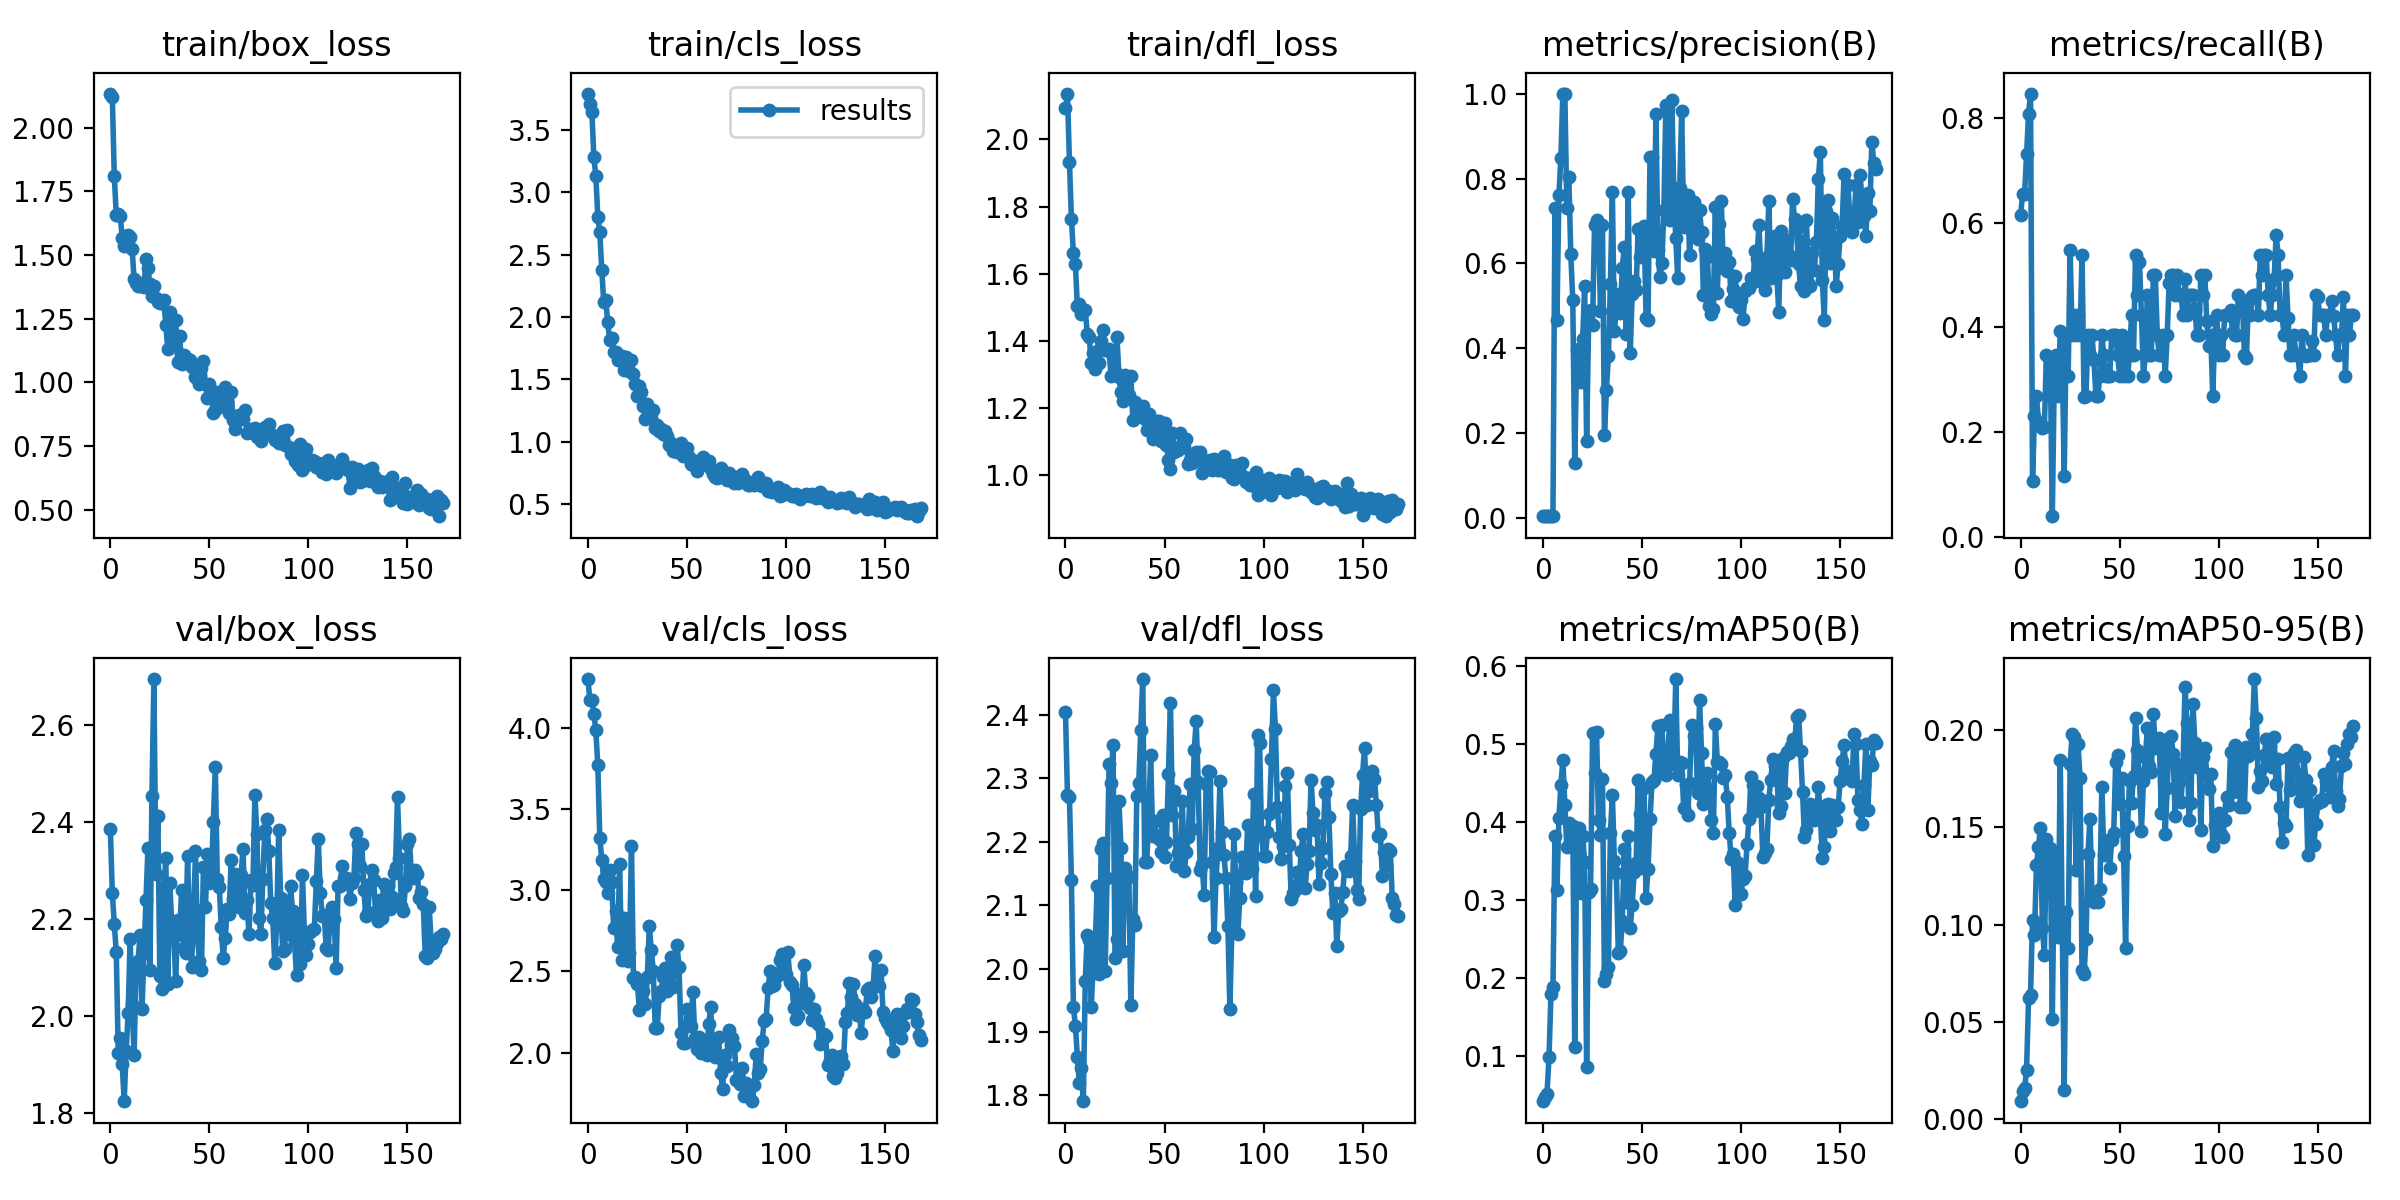

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/results.png', width=600)

/content


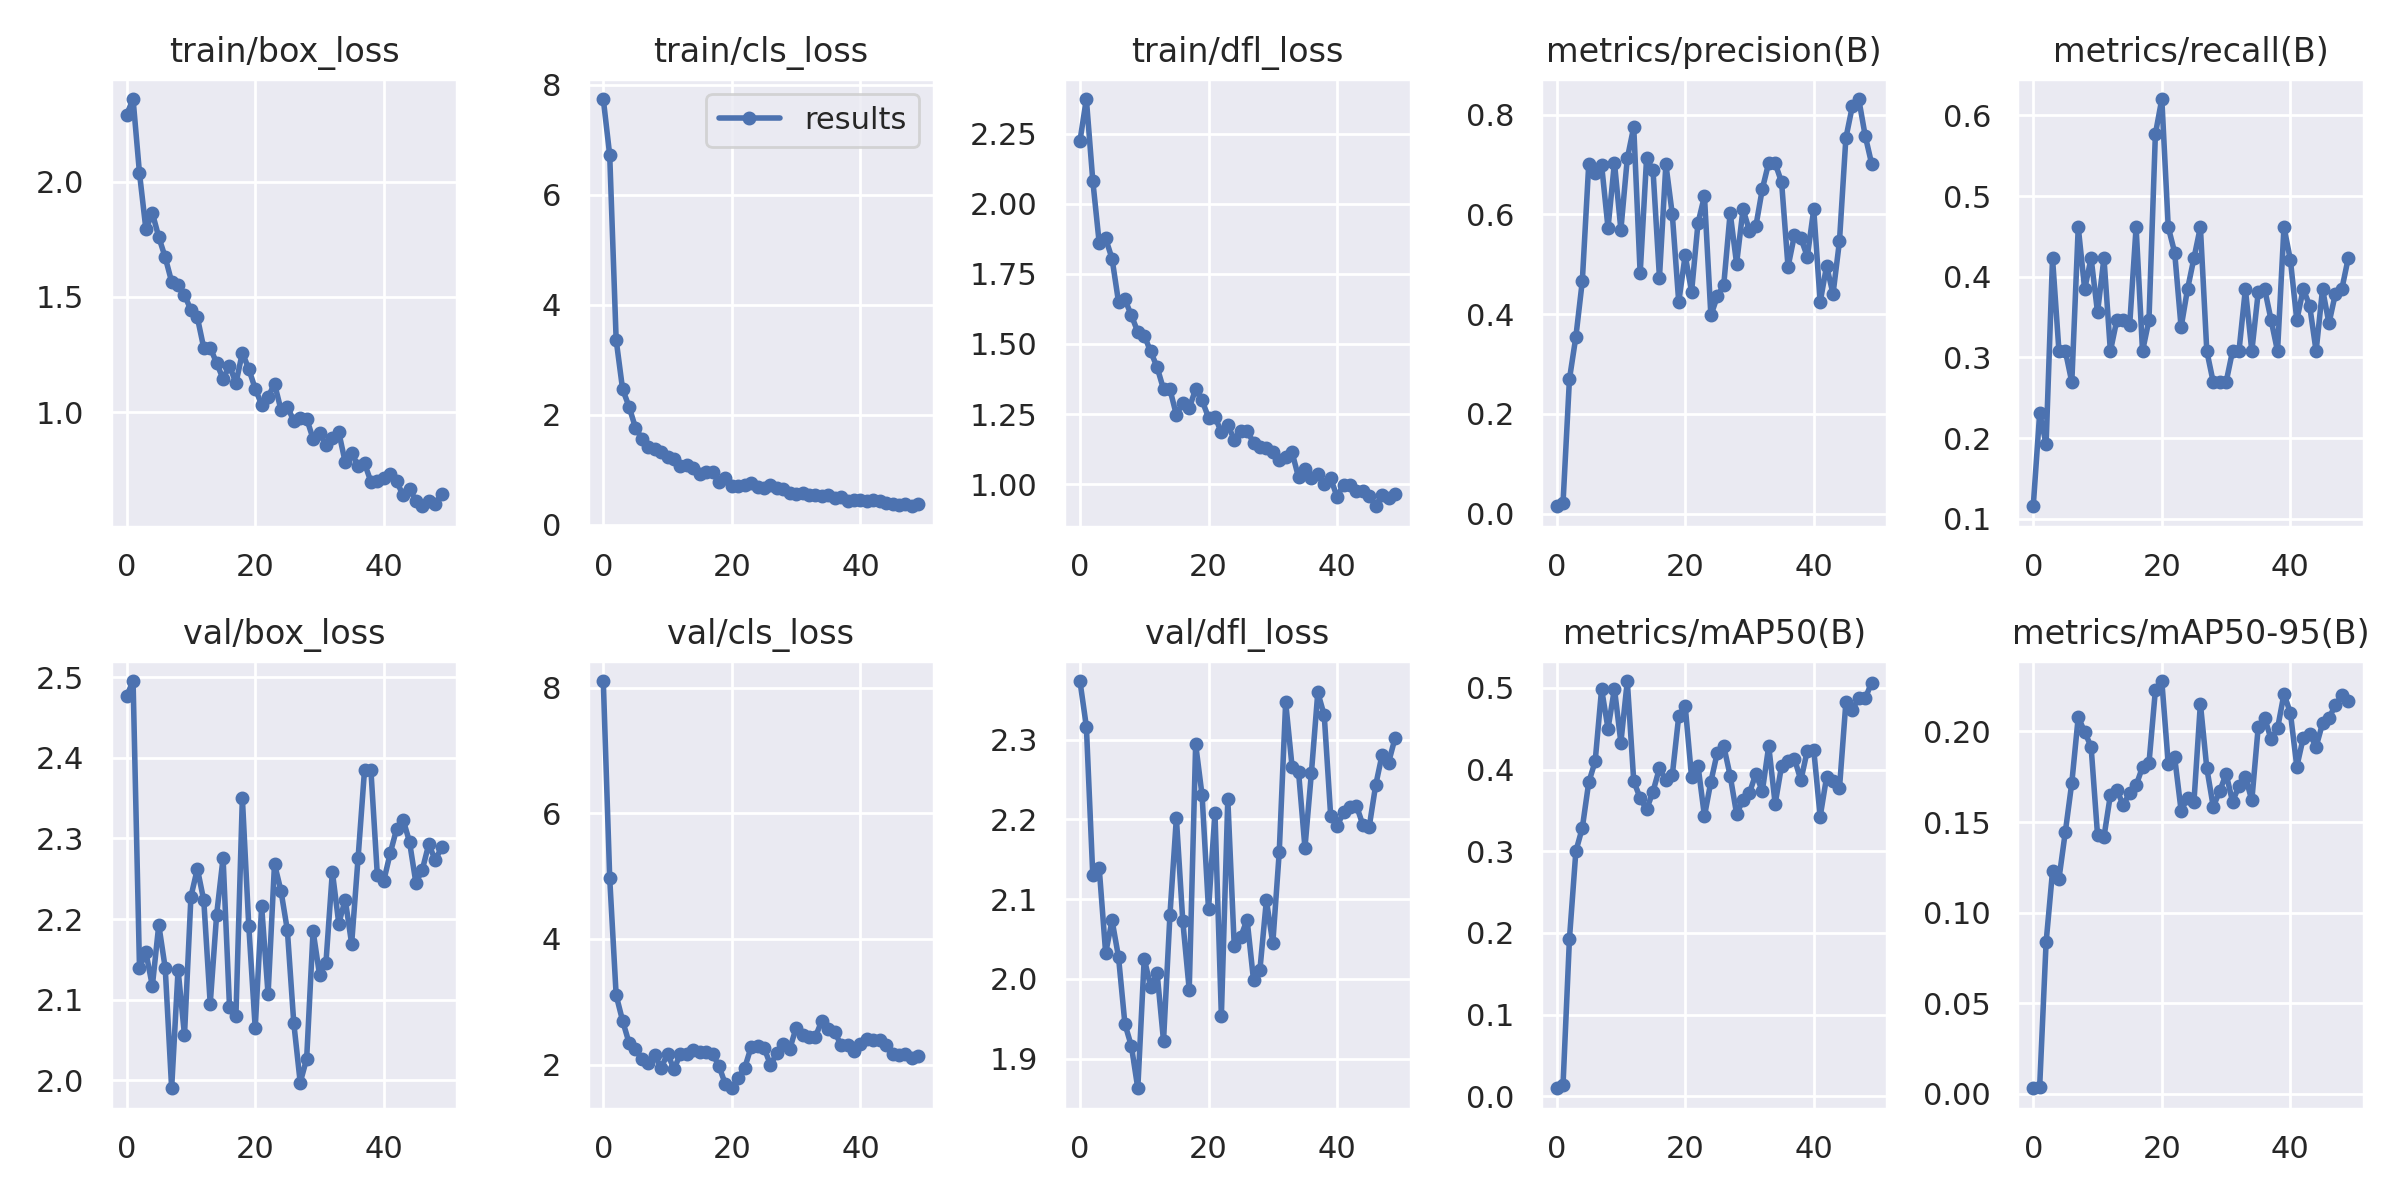

In [21]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/results.png', width=600)

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg', width=600)

/content


FileNotFoundError: ignored

## Validate Custom Model

In [15]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/Printing-Artifact-Detector-4/valid/labels.cache... 14 images, 0 backgrounds, 0 corrupt: 100% 14/14 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.42s/it]
                   all         14         26      0.573      0.462      0.462      0.229
Speed: 0.3ms pre-process, 7.2ms inference, 0.0ms loss, 11.6ms post-process per image


## Inference with Custom Model

In [26]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train5/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/11 /content/datasets/Printing-Artifact-Detector-4/test/images/3308d3ce4515d9ac0667eea2c138b9ac-800x600_jpg.rf.8f7c101e6ae6de4cb0752ad44c529198.jpg: 608x800 1 Printing-Artifact, 87.0ms
image 2/11 /content/datasets/Printing-Artifact-Detector-4/test/images/3D-Printer-First-Layer-not-Sticking-to-Bed-digi3dverse-com__jpeg.rf.3cbf9ebf5cfe5e0cb0084e1a451a0e1f.jpg: 544x800 86.0ms
image 3/11 /content/datasets/Printing-Artifact-Detector-4/test/images/Capture-d-ecran-452-_jpg.rf.2b30efcd1eed99e9837d37785d6a56b3.jpg: 480x800 1 Printing-Artifact, 87.1ms
image 4/11 /content/datasets/Printing-Artifact-Detector-4/test/images/Capture-d-ecran-510-_jpg.rf.f684623e432d893c052b828e7850fa80.jpg: 480x800 15.4ms
image 5/11 /content/datasets/Printing-Artifact-Detector-4/test/images/Capture-d-ecran-514-_jpg.rf.b9ff338ed59e6586136

**NOTE:** Let's take a look at few results.

In [28]:
!zip -r /content/file2.zip /content/

  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/.last_opt_in_prompt.yaml (stored 0%)
  adding: content/.config/.last_update_check.json (deflated 23%)
  adding: content/.config/configurations/ (stored 0%)
  adding: content/.config/configurations/config_default (deflated 15%)
  adding: content/.config/active_config (stored 0%)
  adding: content/.config/.last_survey_prompt.yaml (stored 0%)
  adding: content/.config/config_sentinel (stored 0%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2023.06.07/ (stored 0%)
  adding: content/.config/logs/2023.06.07/17.43.26.868021.log (deflated 58%)
  adding: content/.config/logs/2023.06.07/17.43.19.671327.log (deflated 86%)
  adding: content/.config/logs/2023.06.07/17.43.52.021864.log (deflated 57%)
  adding: content/.config/logs/2023.06.07/17.42.56.236836.log (deflated 57%)
  adding: content/.config/logs/2023.06.07/17.43.51.299211.log (deflated 57%)
  adding: content/.confi

In [29]:
from google.colab import files
files.download("/content/file2.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

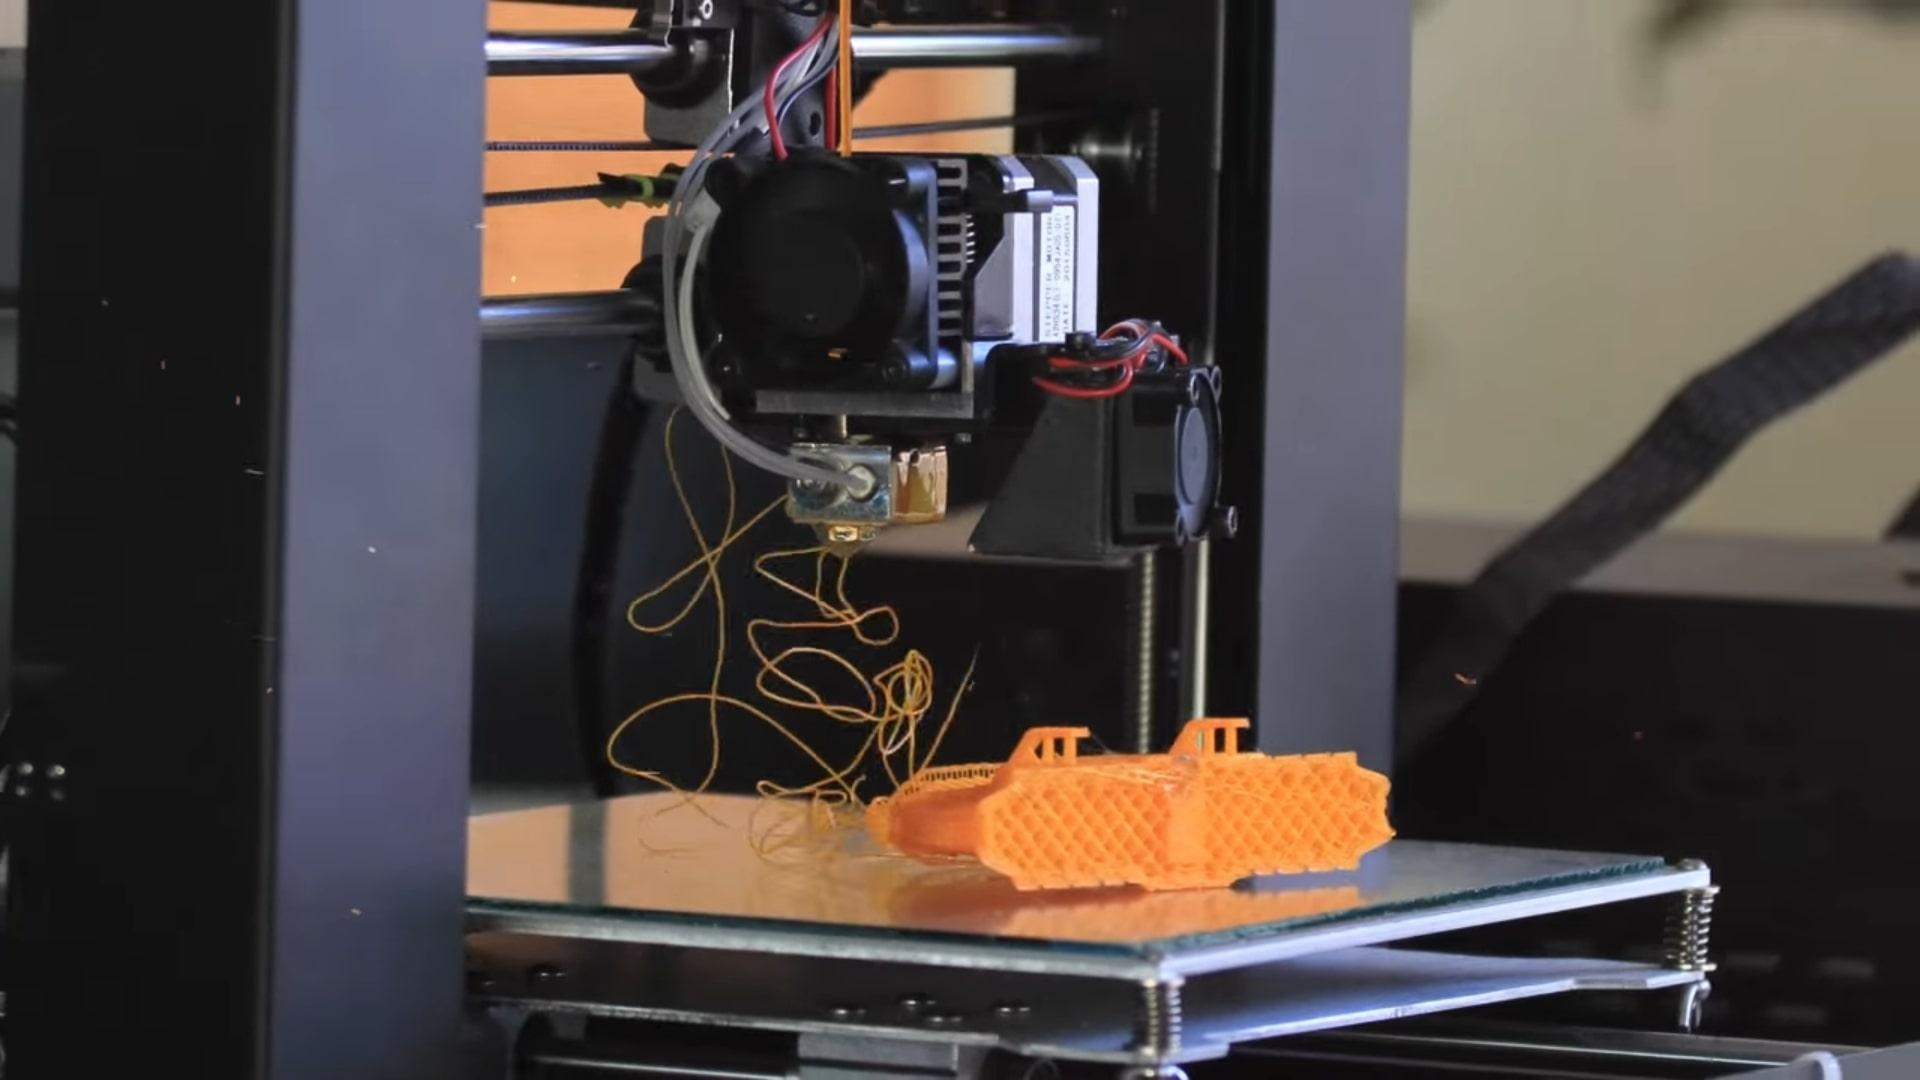

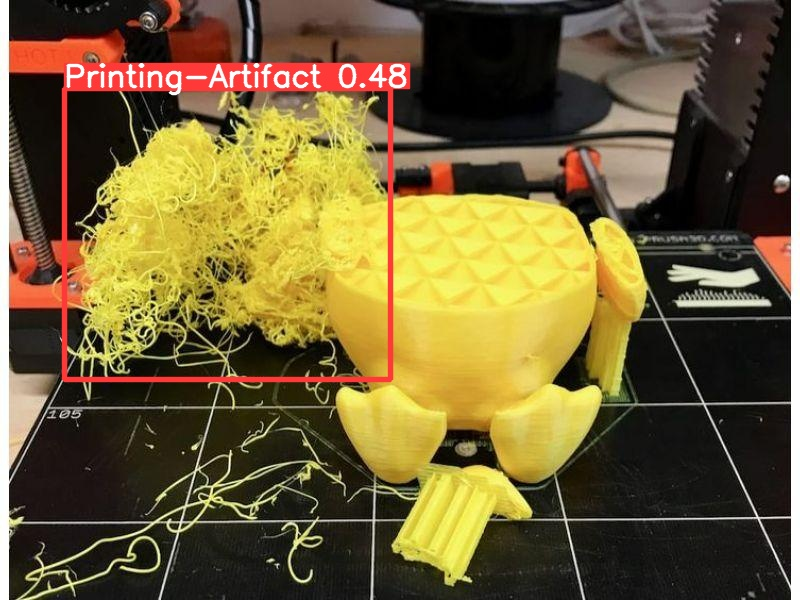

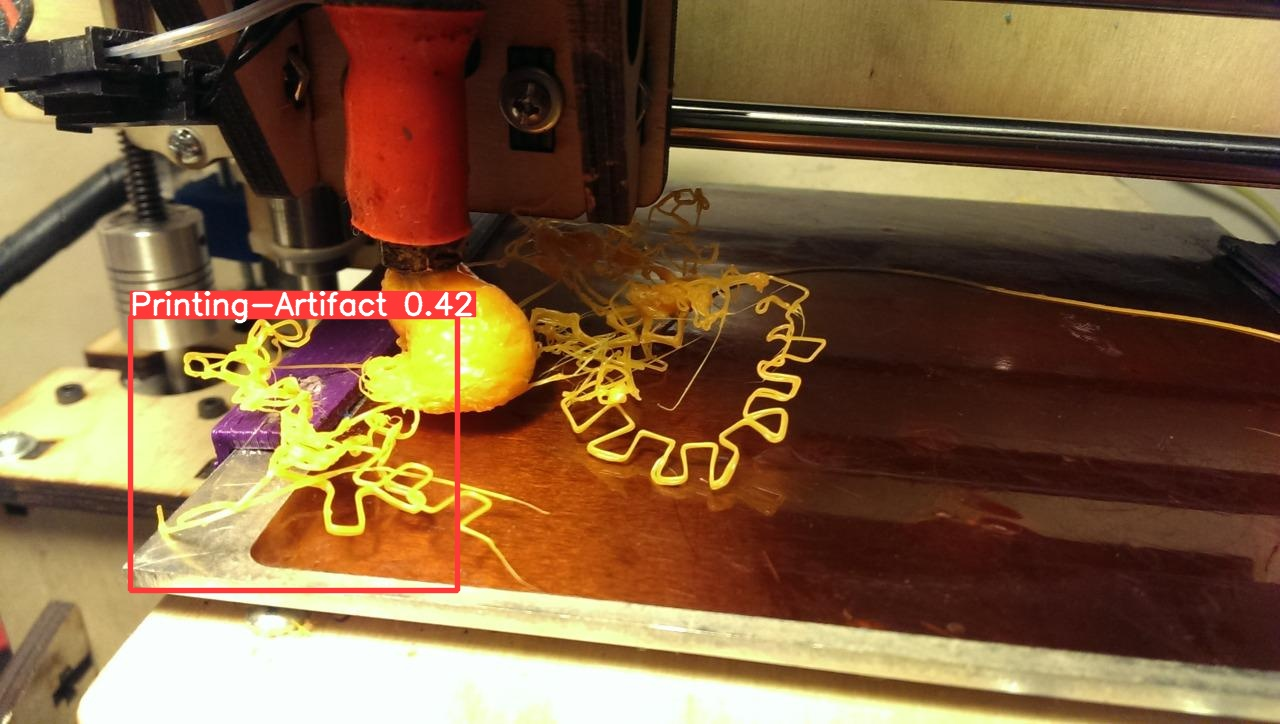

In [27]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")